In [1]:
import pandas as pd
import numpy as np
import json
import os
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns

matplotlib.rcParams['figure.figsize'] = [10,6]

%matplotlib inline

# skip all warnings
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

from datetime import datetime
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, roc_auc_score

In [2]:
# define the data source path
abs_dir = "/Users/etta/Desktop/youtube-new/"

# get the file names
lst = os.listdir(abs_dir)
dfs = pd.DataFrame()

for path in lst:
    if '.csv' in path:
        tmp = pd.read_csv(abs_dir + path, encoding = "latin1")
        # add country attribute
        tmp["country"] = path[:2]
        dfs = pd.concat([dfs,tmp])

# reset index
dfs.index = range(dfs.shape[0])
dfs.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,MX
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,MX
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,MX
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,MX
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,MX


In [3]:
# fetch the categories
id_to_category = {}

with open("/Users/etta/Desktop/youtube-new/US_category_id.json", 'r') as f:
    data = json.load(f)
    for category in data["items"]:
        id_to_category[category["id"]] = category['snippet']['title']

In [4]:
# add category name into original dataset
dfs['category_id'] = dfs['category_id'].astype(str)
dfs['category'] = dfs['category_id'].map(id_to_category)
dfs.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,MX,Entertainment
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,MX,People & Blogs
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,MX,News & Politics
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,MX,News & Politics
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,MX,Howto & Style


In [5]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375942 entries, 0 to 375941
Data columns (total 18 columns):
video_id                  375942 non-null object
trending_date             375942 non-null object
title                     375942 non-null object
channel_title             375942 non-null object
category_id               375942 non-null object
publish_time              375942 non-null object
tags                      375942 non-null object
views                     375942 non-null int64
likes                     375942 non-null int64
dislikes                  375942 non-null int64
comment_count             375942 non-null int64
thumbnail_link            375942 non-null object
comments_disabled         375942 non-null bool
ratings_disabled          375942 non-null bool
video_error_or_removed    375942 non-null bool
description               356464 non-null object
country                   375942 non-null object
category                  375942 non-null object
dtypes: bool(3), 

Only `description` has missing value, let's use tags to fill it.

In [6]:
dfs['description'] = dfs['description'].fillna(dfs['tags'])

In [7]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375942 entries, 0 to 375941
Data columns (total 18 columns):
video_id                  375942 non-null object
trending_date             375942 non-null object
title                     375942 non-null object
channel_title             375942 non-null object
category_id               375942 non-null object
publish_time              375942 non-null object
tags                      375942 non-null object
views                     375942 non-null int64
likes                     375942 non-null int64
dislikes                  375942 non-null int64
comment_count             375942 non-null int64
thumbnail_link            375942 non-null object
comments_disabled         375942 non-null bool
ratings_disabled          375942 non-null bool
video_error_or_removed    375942 non-null bool
description               375942 non-null object
country                   375942 non-null object
category                  375942 non-null object
dtypes: bool(3), 

In [8]:
dfs.shape

(375942, 18)

## Numerical Columns

In [9]:
dfs['popularity'] = (dfs['likes'] + dfs['dislikes'] + dfs['comment_count']) / dfs['views']

In [10]:
dfs.describe()

,views,likes,dislikes,comment_count,popularity
count,3.759420e+05,3.759420e+05,3.759420e+05,3.759420e+05,375942.000000
mean,1.326568e+06,3.788431e+04,2.126107e+03,4.253775e+03,0.043249
std,7.098568e+06,1.654131e+05,2.248437e+04,2.545876e+04,0.045295
min,1.170000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.697800e+04,6.690000e+02,4.100000e+01,1.090000e+02,0.011376
50%,1.773705e+05,3.446000e+03,1.790000e+02,5.110000e+02,0.028327
75%,6.476792e+05,1.747650e+04,7.490000e+02,2.011000e+03,0.061006
max,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06,0.996741


### Histograms

**Views**

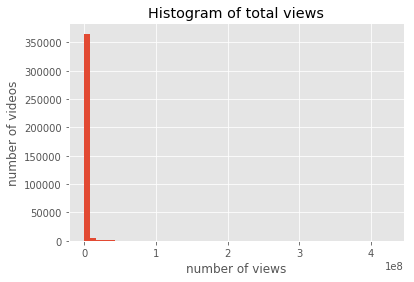

In [11]:
dfs['views'].hist(bins = 50)
plt.xlabel("number of views")
plt.ylabel('number of videos')
plt.title('Histogram of total views')
plt.show()

**Likes**

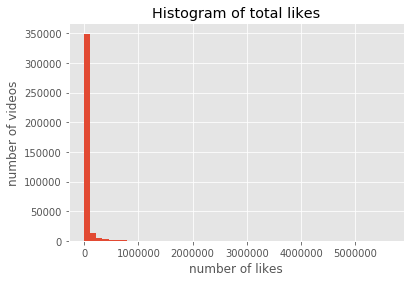

In [12]:
dfs['likes'].hist(bins = 50)
plt.xlabel("number of likes")
plt.ylabel('number of videos')
plt.title('Histogram of total likes')
plt.show()

**Dislikes**

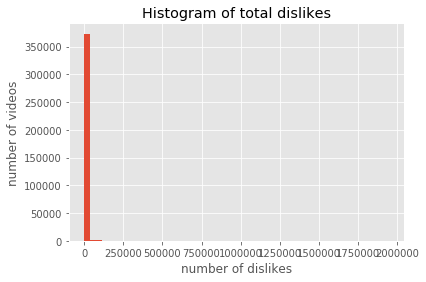

In [13]:
dfs['dislikes'].hist(bins = 50)
plt.xlabel("number of dislikes")
plt.ylabel('number of videos')
plt.title('Histogram of total dislikes')
plt.show()

**Comment Counts**

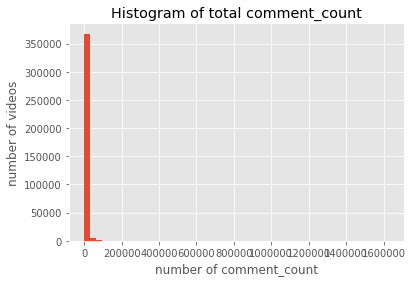

In [14]:
dfs['comment_count'].hist(bins = 50)
plt.xlabel("number of comment_count")
plt.ylabel('number of videos')
plt.title('Histogram of total comment_count')
plt.show()

**Popularity**

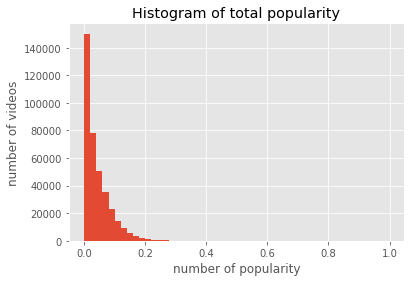

In [15]:
dfs['popularity'].hist(bins = 50)
plt.xlabel("number of popularity")
plt.ylabel('number of videos')
plt.title('Histogram of total popularity')
plt.show()

### Categorical variables

In [16]:
dfs.describe(exclude=[np.number])

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category
count,375942,375942,375942,375942,375942,375942,375942,375942,375942,375942,375942,375942,375942,375942
unique,184287,205,186272,37824,18,169286,142211,185690,2,2,2,160540,10,18
top,#NAME?,18.08.02,Mission: Impossible - Fallout (2018) - Officia...,The Late Show with Stephen Colbert,24,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,[none],US,Entertainment
freq,2312,1965,100,984,109006,92,37698,92,367479,368634,375689,11509,40949,109006


### Channel

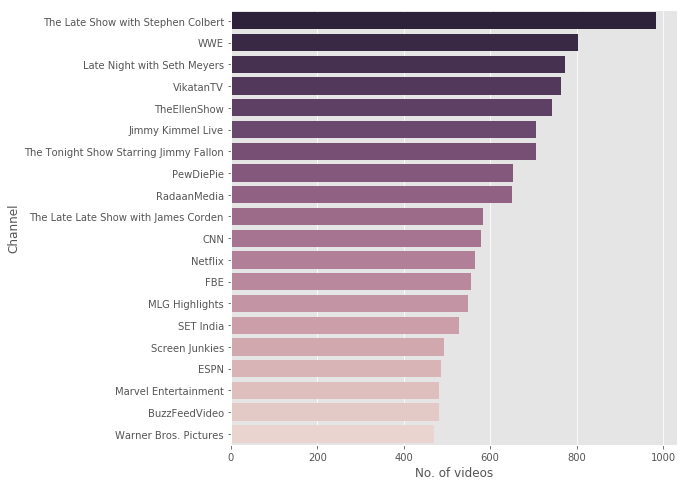

In [17]:
cdf = dfs.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

### Country

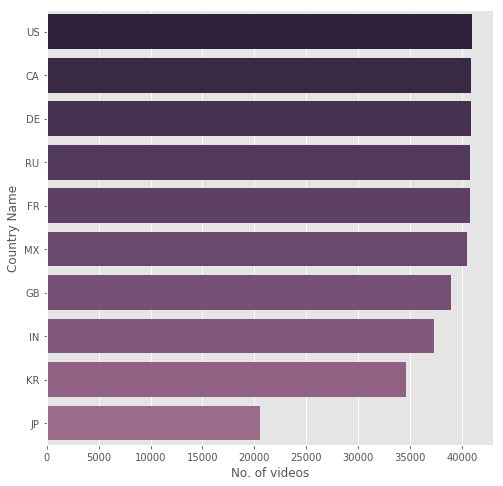

In [18]:
cdf = dfs.groupby("country").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="country", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Country Name")

### Topics

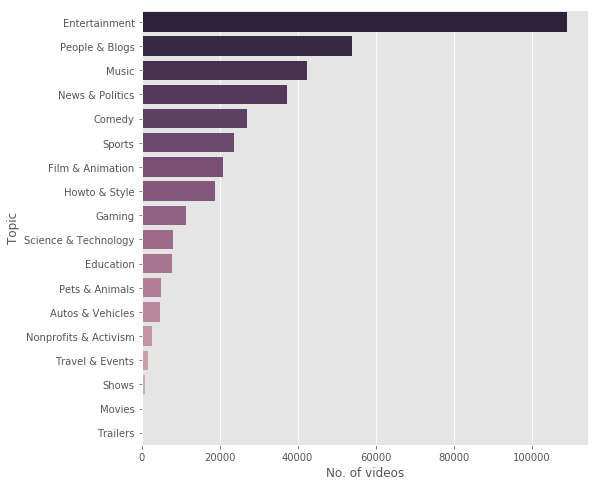

In [19]:
cdf = dfs.groupby("category").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="category", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Topic")

### Target variable -- popularity

In [20]:
dfs['popularity'].describe()

count    375942.000000
mean          0.043249
std           0.045295
min           0.000000
25%           0.011376
50%           0.028327
75%           0.061006
max           0.996741
Name: popularity, dtype: float64

In [21]:
dfs['is_popular'] = dfs['popularity'].apply(lambda x: 0 if x <= 0.028 else 1)

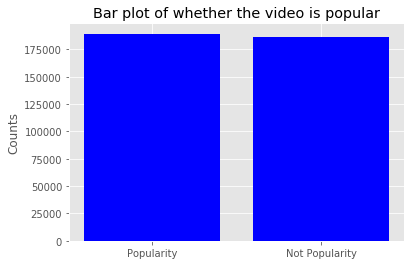

In [22]:
# Bar plot
x_pos = ['Popularity', 'Not Popularity']
x = dfs['is_popular'].value_counts()

plt.bar(x_pos, x, color='blue')
plt.ylabel('Counts')
plt.title("Bar plot of whether the video is popular")
plt.show()

## Feature Engineering

In [23]:
feature_removal = ['video_id','title','channel_title','trending_date',
                   'tags','views','likes','dislikes','comment_count','thumbnail_link','description','popularity']

In [24]:
dfs.drop(columns=feature_removal, axis=1, inplace=True)

In [25]:
# get hour of publish time
dfs['publish_hour'] = dfs['publish_time'].apply(lambda x: x[11:13])
# get day of publish time
dfs['publish_day'] = dfs['publish_time'].apply(lambda x: x[8:10])
# get month of publish time
dfs['publish_month'] = dfs['publish_time'].apply(lambda x: x[5:7])

In [26]:
dfs.drop(columns=['publish_time'], axis=1, inplace=True)

In [27]:
dfs['comments_disabled'] = dfs['comments_disabled'].apply(int)
dfs['ratings_disabled'] = dfs['ratings_disabled'].apply(int)
dfs['video_error_or_removed'] = dfs['video_error_or_removed'].apply(int)

In [28]:
# label encoder
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(dfs['country'])
dfs['country'] = le.transform(dfs['country'])

In [29]:
le = preprocessing.LabelEncoder()
le.fit(dfs['category'])
dfs['category'] = le.transform(dfs['category'])

In [30]:
dfs.head()

,category_id,comments_disabled,ratings_disabled,video_error_or_removed,country,category,is_popular,publish_hour,publish_day,publish_month
0,24,0,0,0,7,3,0,06,13,11
1,22,0,0,0,7,11,0,05,13,11
2,25,0,0,0,7,9,1,17,13,11
3,25,0,0,0,7,9,0,03,13,11
4,26,0,0,0,7,6,1,19,13,11


## Prdictive Modeling

### Train Test Split

In [31]:
# get X and y

y = dfs['is_popular'].values
X = dfs.drop(['is_popular'], axis=1).values

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train.shape

(300753, 9)

### Model Selection

In [33]:
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
import time

# 9 candidate models
models = [LogisticRegression, 
          DecisionTreeClassifier, 
          RandomForestClassifier,
          AdaBoostClassifier,
          XGBClassifier,
          KNeighborsClassifier,
          ExtraTreesClassifier]

labels = ['lr','dt','rf','ada','xgb','knn','et']

print('5-fold cross validation:\n')
# train models
for model, label in zip(models,labels):
    scores = cross_val_score(model(), X_train, y_train, cv=3, scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" 
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

Accuracy: 0.5718 (+/- 0.0004) [lr]
Accuracy: 0.7661 (+/- 0.0007) [dt]
Accuracy: 0.7752 (+/- 0.0008) [rf]
Accuracy: 0.6632 (+/- 0.0006) [ada]
Accuracy: 0.6781 (+/- 0.0010) [xgb]
Accuracy: 0.7393 (+/- 0.0012) [knn]
Accuracy: 0.7748 (+/- 0.0006) [et]


### Tune Hyperparams

In [34]:
# Random Forest outperforms!!!!

from sklearn.model_selection import GridSearchCV
# Random Forest hyperparameters
rf_params = {
    'n_estimators': [300],
    'max_depth': [None],
    'min_samples_split': [3],
    'min_samples_leaf':[2]
}

# models
rf_clf = RandomForestClassifier

# pairs list
clf_params = [(rf_clf,rf_params)]

# hyperparameter tuning
tune_results = {}

for clf, params in clf_params:
    
    start = time.time()
    tune = GridSearchCV(clf(),params,scoring="accuracy",cv=3,verbose=True,n_jobs=-1)
    tune.fit(X_train, y_train)
    best_estimator = tune.best_estimator_
    best_params = tune.best_params_
    best_score = tune.best_score_
    tune_results[clf] = (best_estimator, best_params, best_score, (time.time()-start)/60)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.7min finished


In [35]:
tune_results

{sklearn.ensemble.forest.RandomForestClassifier: (RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=3,
              min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False),
  {'max_depth': None,
   'min_samples_leaf': 2,
   'min_samples_split': 3,
   'n_estimators': 300},
  0.779998869504211,
  3.221445115407308)}

### Feature Importance

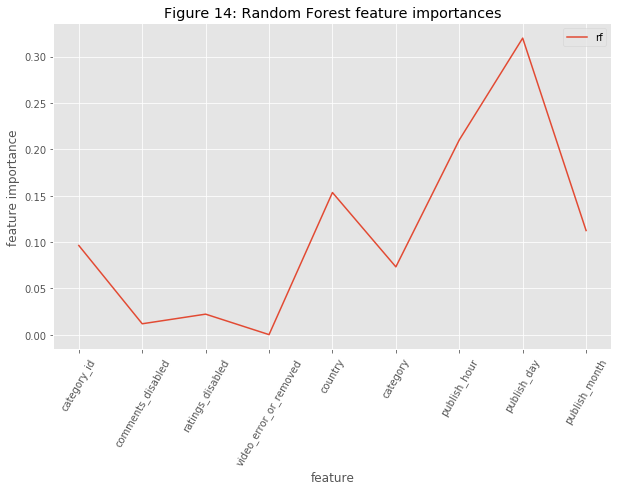

In [36]:
predictors = [x for x in dfs.columns if x != 'is_popular']
# show feature importances
feature_importance = pd.DataFrame(predictors, columns=['feature'])
feature_importance['rf'] = tune_results[rf_clf][0].feature_importances_
feature_importance.plot(x='feature',y=['rf'],xticks=range(len(predictors)),rot=60,figsize=(10,6))
plt.ylabel('feature importance')
plt.title("Figure 14: Random Forest feature importances")
plt.show()

### On Test Set

In [37]:
# individuals
model_labels = ['rf']
all_clfs = [x[0] for x in clf_params]

for clf, label in zip(all_clfs, model_labels):
    print ("Accuracy: %0.4f [%s]" %(tune_results[clf][0].score(X_test, y_test), label))

Accuracy: 0.7911 [rf]
